In [1]:
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
# graficar imagenes estaticas en el notebook
%matplotlib inline

Mounted at /content/drive


In [11]:
path='/content/drive/MyDrive/Trabajos De aulas/Semestre 7/PDI/PROYECTO FINAL'
os.chdir(path)
!pwd

/content/drive/MyDrive/Trabajos De aulas/Semestre 7/PDI/PROYECTO FINAL


In [3]:
# Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    axs[i].axis('off')
  plt.show()

In [4]:
# 
def displayGray4(a, b, c, d,title1 = "Rojo", title2 = "Amarillo",title3 = "Verde", title4 = "Azul"):
    plt.figure(figsize=(10,10))
    plt.subplot(221), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(224), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [5]:
# GLOBAL IMAGE
img=cv2.imread('/content/drive/MyDrive/Trabajos De aulas/Semestre 7/PDI/PROYECTO FINAL/mahon.jpg')
#img=cv2.imread('/content/drive/MyDrive/Trabajos De aulas/Semestre 7/PDI/PROYECTO FINAL/calvia-y-andraitx.jpg')
#img=cv2.imread('/content/drive/MyDrive/Trabajos De aulas/Semestre 7/PDI/PROYECTO FINAL/PALMA-GRANDE.jpg')
#img=cv2.imread('/content/drive/MyDrive/Trabajos De aulas/Semestre 7/PDI/PROYECTO FINAL/prueba.jpeg')

**FOREST DETECTOR**

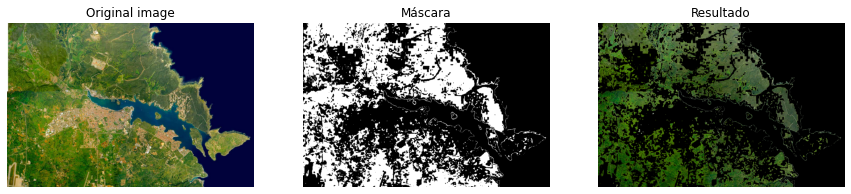

Number of white pixels: 532194
Number of black pixels: 967806
Cantidad de pixeles en la imagen: 1500000
El porcentaje de verde en la imagen es de : 35.4796


In [6]:
imgRBG = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertir imagenOriginal en RBG para usarla en el resultado
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # Convertir la imagen a HSV

# creamos los valores del umbral del color verde
i_h = 45 # el color verde en empieza en HSV 50 después del color amarillo 
i_s = 0
i_v = 0

s_h = 80 # el color verde en termina en HSV 80 antes del color azul 
s_s = 255
s_v = 255

# se calculan los umbrales inferiores y superiores desde 50 a 80
lower_green = np.array([i_h, i_s, i_v])
upper_green = np.array([s_h, s_s, s_v])

# se calcula la máscara
mask = cv2.inRange(imgHSV, lower_green, upper_green)
resultBosque = cv2.bitwise_and(imgRBG, imgRBG, mask=mask)

maskBosque = mask
# Plot the images
images = [imgRBG, mask, resultBosque]
titles = ['Original image', 'Máscara', 'Resultado']
plot_img(images, titles)

numero_de_pixeles_blanco = np.sum(mask == 255) 
numero_de_pixeles_negro = np.sum(mask == 0) 

print('Number of white pixels:', numero_de_pixeles_blanco) 
print('Number of black pixels:', numero_de_pixeles_negro)

total = numero_de_pixeles_blanco + numero_de_pixeles_negro
print('Cantidad de pixeles en la imagen:', total)

porcentajeBosque= (numero_de_pixeles_blanco * 100) / total
print('El porcentaje de verde en la imagen es de :', porcentajeBosque)



**EARTH DETECTOR**

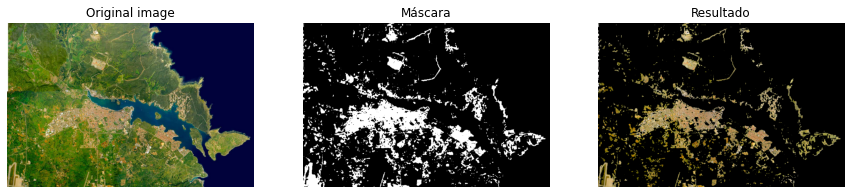

Number of white pixels: 223742
Number of black pixels: 1276258
Cantidad de pixeles en la imagen: 1500000
El porcentaje de tierra en la imagen es de : 14.916133333333333


In [7]:
imgRBG = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertir imagenOriginal en RBG para usarla en el resultado
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # Convertir la imagen a HSV

# creamos los valores del umbral del color tierra
i_h = 90 
i_s = 0
i_v = 0

s_h = 150 
s_s = 255
s_v = 255

# se calculan los umbrales inferiores y superiores desde 20 a 30
lower_yellow = np.array([i_h, i_s, i_v])
upper_yellow = np.array([s_h, s_s, s_v])

# se calcula la máscara
mask = cv2.inRange(imgHSV, lower_yellow, upper_yellow)
resultTierra = cv2.bitwise_and(imgRBG, imgRBG, mask=mask)

maskTierra = mask
# Plot the images
images = [imgRBG, mask, resultTierra]
titles = ['Original image', 'Máscara', 'Resultado']
plot_img(images, titles)

numero_de_pixeles_blanco = np.sum(mask == 255) 
numero_de_pixeles_negro = np.sum(mask == 0) 

print('Number of white pixels:', numero_de_pixeles_blanco) 
print('Number of black pixels:', numero_de_pixeles_negro)

total = numero_de_pixeles_blanco + numero_de_pixeles_negro
print('Cantidad de pixeles en la imagen:', total)

porcentajeTierra = (numero_de_pixeles_blanco * 100) / total
print('El porcentaje de tierra en la imagen es de :', porcentajeTierra)

**WATER DETECTOR**

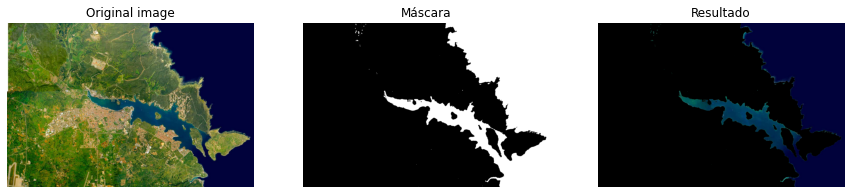

Number of white pixels: 419986
Number of black pixels: 1080014
Cantidad de pixeles en la imagen: 1500000
El porcentaje de agua en la imagen es de : 27.999066666666668


In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertir imagenOriginal en RBG para usarla en el resultado
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # Convertir la imagen a HSV

# creamos los valores del umbral del color azul
i_h = 80 
i_s = 100
i_v = 35

s_h = 150 
s_s = 255
s_v = 255


# se calculan los umbrales inferiores y superiores desde 80 a 150
lower_blue = np.array([i_h, i_s, i_v])
upper_blue = np.array([s_h, s_s, s_v])

# se calcula la máscara
mask = cv2.inRange(imgHSV, lower_blue, upper_blue)
resultWater = cv2.bitwise_and(imgRBG, imgRBG, mask=mask)

maskWater = mask
# Plot the images
images = [imgRBG, mask, resultWater]
titles = ['Original image', 'Máscara', 'Resultado']
plot_img(images, titles)

numero_de_pixeles_blanco = np.sum(mask == 255) 
numero_de_pixeles_negro = np.sum(mask == 0) 

print('Number of white pixels:', numero_de_pixeles_blanco) 
print('Number of black pixels:', numero_de_pixeles_negro)

total = numero_de_pixeles_blanco + numero_de_pixeles_negro
print('Cantidad de pixeles en la imagen:', total)

porcentajeAgua = (numero_de_pixeles_blanco * 100) / total
print('El porcentaje de agua en la imagen es de :', porcentajeAgua)

**Display all masks**

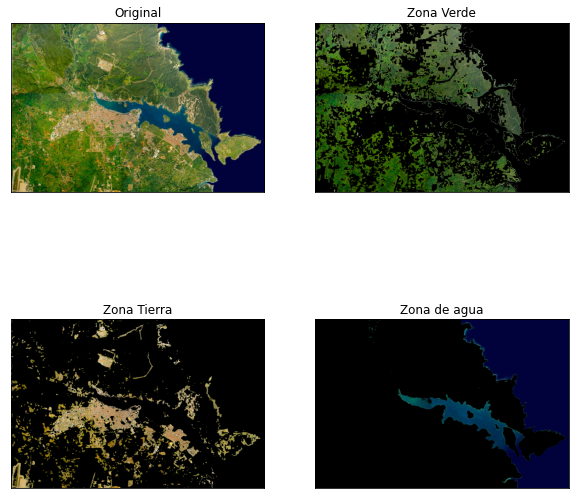

Porcetajes totales: 
 Zona Verde: 35.4796
 Zona Tierra: 14.916133333333333
 Zona de agua: 27.999066666666668
Porcentaje total:  78.3948


In [9]:
displayGray4(imgRBG, resultBosque, resultTierra, resultWater, "Original", "Zona Verde", "Zona Tierra", "Zona de agua")

print("Porcetajes totales: " + "\n Zona Verde: " + str(porcentajeBosque) + "\n Zona Tierra: " + str(porcentajeTierra) + "\n Zona de agua: " + str(porcentajeAgua))
totalPorcentaje = porcentajeBosque + porcentajeTierra + porcentajeAgua
print("Porcentaje total: ", totalPorcentaje)



**Reconstruction image**

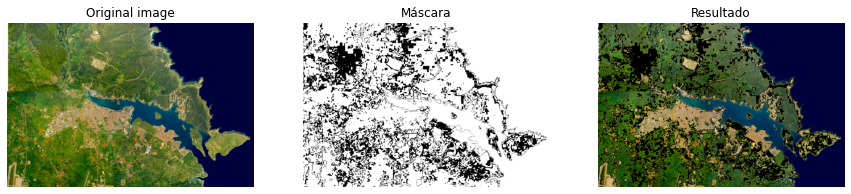

Portaje pérdido:  21.6052
Portaje total de la zona:  78.3948
total 100.0


In [10]:
mask = maskBosque + maskWater + maskTierra
result = cv2.bitwise_and(imgRBG, imgRBG, mask = mask)

images = [img, mask, result]
titles = ['Original image', 'Máscara', 'Resultado']
plot_img(images, titles)


numero_de_pixeles_blanco = np.sum(mask == 255) 
numero_de_pixeles_negro = np.sum(mask == 0) 

porcentajePerdido = (numero_de_pixeles_negro * 100) / total
porcentajeTotal = (numero_de_pixeles_blanco * 100) / total
print("Portaje pérdido: ", porcentajePerdido)
print("Portaje total de la zona: ", porcentajeTotal)
t = porcentajePerdido + porcentajeTotal
print("total", t)